In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [26]:
data=pd.read_csv("spam.csv")

In [27]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [28]:
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
data = data.drop(columns_to_drop, axis=1, errors='ignore')
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
data.columns = ['Label', 'Text']
data.reset_index()
data.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [31]:
data.isna().sum()

Label    0
Text     0
dtype: int64

In [32]:
data['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

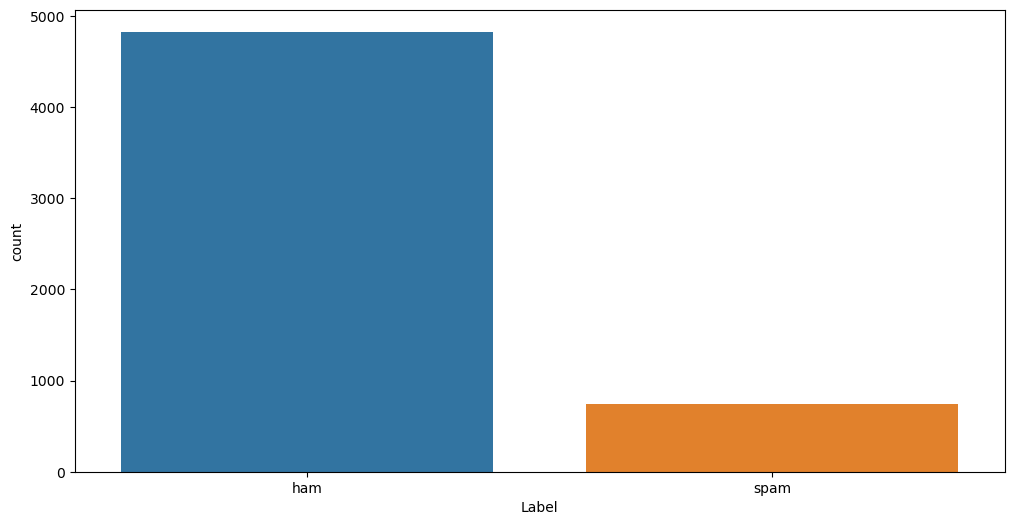

In [33]:
plt.figure(figsize = (12, 6))
sns.countplot(data = data, x = 'Label');

In [34]:
for i in data.iterrows():
    print("Class Label: {}\nMail: \n{}\n\n".format(i[1][0], i[1][1]))
    if i[0] == 6: break

Class Label: ham
Mail: 
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


Class Label: ham
Mail: 
Ok lar... Joking wif u oni...


Class Label: spam
Mail: 
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


Class Label: ham
Mail: 
U dun say so early hor... U c already then say...


Class Label: ham
Mail: 
Nah I don't think he goes to usf, he lives around here though


Class Label: spam
Mail: 
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv


Class Label: ham
Mail: 
Even my brother is not like to speak with me. They treat me like aids patent.




In [35]:
data['Label'] = data['Label'].apply(lambda x: 1 if x == 'spam' else 0)

In [36]:
data.head()

,Label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
X = data['Text']
y = data['Label']

print(f"Shape of X: {X.shape}\nshape of y: {y.shape}")

Shape of X: (5572,)
shape of y: (5572,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [39]:
X_train

81                       K. Did you call me just now ah? 
777     \Hi its Kate it was lovely to see you tonight ...
5507               I want to be inside you every night...
1201                                 I know she called me
107     How would my ip address test that considering ...
                              ...                        
1293     Happy birthday... May all ur dreams come true...
4023                               Wat time Ì_ wan today?
5200    Call Germany for only 1 pence per minute! Call...
3775                            Ok lor. Msg me b4 u call.
1945    Can Ì_ call me at 10:10 to make sure dat i've ...
Name: Text, Length: 4457, dtype: object

In [40]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [41]:
y_train = y_train.astype("int")
y_test = y_test.astype("int")
print(X_train_features)

  (0, 877)	0.6954888409958451
  (0, 3757)	0.4329702706884182
  (0, 2257)	0.5734387646037316
  (1, 7385)	0.2749117276851198
  (1, 1608)	0.2975102204809158
  (1, 2997)	0.33164731107945933
  (1, 3187)	0.2838204147906513
  (1, 5974)	0.3529330057985017
  (1, 3106)	0.18867193171838778
  (1, 6727)	0.23213860801388614
  (1, 5017)	0.2159225270092865
  (1, 3500)	0.2648059216524734
  (1, 6736)	0.25050145879498403
  (1, 4108)	0.3172250630776571
  (1, 3782)	0.321541505046813
  (1, 3319)	0.21864064438792827
  (2, 4634)	0.5037523598148529
  (2, 3573)	0.7420059623962579
  (2, 7126)	0.4423355194299571
  (3, 1572)	0.8284232413987768
  (3, 3842)	0.5601026094478975
  (4, 5835)	0.4014035532370908
  (4, 4361)	0.4014035532370908
  (4, 3636)	0.3228333711509288
  (4, 1900)	0.3188231013845223
  :	:
  (4454, 5207)	0.24184585733296834
  (4454, 688)	0.4836917146659367
  (4454, 695)	0.24184585733296834
  (4454, 67)	0.24184585733296834
  (4454, 3025)	0.23346724088225862
  (4454, 4973)	0.23346724088225862
  (4454, 78

In [42]:
lr = LogisticRegression()
lr.fit(X_train_features, y_train)

LogisticRegression()

In [54]:
predict_train_data=lr.predict(X_train_features)

In [57]:
accuracy_train_data=accuracy_score(y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9667938074938299


In [58]:
predict_test_data=lr.predict(X_test_features)
accuracy_test_data=accuracy_score(y_test,predict_test_data)
print("Accuracy on testing data: ",accuracy_test_data)

Accuracy on testing data:  0.9721973094170404


In [59]:
model = SVC()
model.fit(X_train_features, y_train)

SVC()

In [60]:
predict_train_svm=model.predict(X_train_features)
accuracy_train_data=accuracy_score(y_train,predict_train_svm)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9982050706753421


In [61]:
predict_test_svm=model.predict(X_test_features)
accuracy_test_data=accuracy_score(y_test,predict_test_svm)
print("Accuracy on testing data: ",accuracy_test_data)

Accuracy on testing data:  0.9883408071748879


In [62]:
NB=MultinomialNB()
NB.fit(X_train_features, y_train)

MultinomialNB()

In [63]:
predict_train_NB=NB.predict(X_train_features)
accuracy_train_data=accuracy_score(y_train,predict_train_NB)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9820507067534215


In [64]:
predict_test_NB=NB.predict(X_test_features)
accuracy_test_data=accuracy_score(y_test,predict_test_NB)
print("Accuracy on testing data: ",accuracy_test_data)

Accuracy on testing data:  0.9802690582959641


In [65]:
report=classification_report(y_test,predict_test_NB)
print("The Classification report of the perform model is \n",report)

The Classification report of the perform model is 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       982
           1       1.00      0.83      0.91       133

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



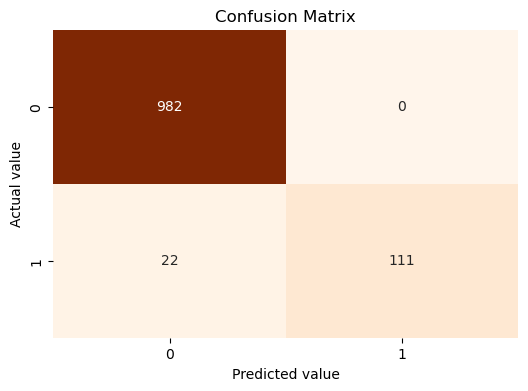

In [66]:
conf_matrix=confusion_matrix(y_test,predict_test_NB)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

In [71]:
new_mail=["Free entry in 2 a wkly comp to win FA Cup final"]
new_data_features=feature_extraction.transform(new_mail)
prediction=NB.predict(new_data_features)
print(prediction)

if(prediction[0]==0):
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Spam Mail
